# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
%pip install splinter webdriver_manager 


Note: you may need to restart the kernel to use updated packages.


In [2]:
! pip install splinter webdriver_manager
 
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [3]:
# Set up the browser using Splinter
browser = Browser('chrome', headless=False)


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the Mars Temperature Data Site
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html, 'html.parser')
table = soup.find('table')

In [23]:
# Extract all rows of data
# Read the table data using Pandas
mars_data = pd.read_html(str(table))
# Convert the table data into a DataFrame
mars_df = mars_data[0]

/var/folders/48/6ml1twyn1t9_tkycp8mgx3mh0000gn/T/ipykernel_10800/1793074002.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mars_data = pd.read_html(str(table))


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [24]:
# Create an empty list

# Loop through the scraped data to create a list of rows
column_headings = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df.columns = column_headings

In [25]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
print(mars_df.head())

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


In [26]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [27]:
# Examine data type of each column
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df = mars_df.astype({'id': int, 'sol': int, 'ls': int, 'month': int, 'min_temp': float, 'pressure': float})

In [12]:
# Confirm type changes were successful by examining data types again
# Convert data types to appropriate types
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df = mars_df.astype({'id': int, 'sol': int, 'ls': int, 'month': int, 'min_temp': float, 'pressure': float})


In [28]:

# Analyze the dataset
# 1. How many months exist on Mars?
num_months = mars_df['month'].nunique()
print(f"Number of months on Mars: {num_months}")


Number of months on Mars: 12


In [29]:

# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_martian_days = len(mars_df)
print(f"Number of Martian days in the dataset: {num_martian_days}")


Number of Martian days in the dataset: 1867


In [31]:

# 3. Coldest and warmest months on Mars
avg_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
coldest_month = avg_temp_by_month.idxmin()
warmest_month = avg_temp_by_month.idxmax()
print(f"Coldest month on Mars: {coldest_month}")
print(f"Warmest month on Mars: {warmest_month}")


Coldest month on Mars: 3
Warmest month on Mars: 8


<Axes: title={'center': 'Average Minimum Daily Temperature by Month'}, xlabel='Month', ylabel='Average Min Temp (C)'>

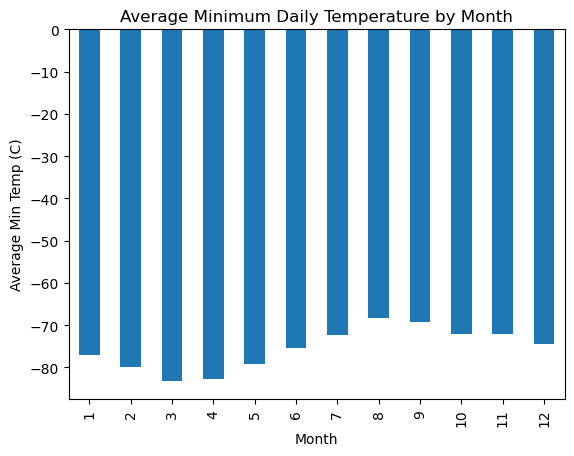

In [32]:

# Plotting average minimum daily temperature by month
avg_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Min Temp (C)', title='Average Minimum Daily Temperature by Month')


In [33]:

# 4. Months with lowest and highest atmospheric pressure
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()
print(f"Month with lowest atmospheric pressure: {lowest_pressure_month}")
print(f"Month with highest atmospheric pressure: {highest_pressure_month}")


Month with lowest atmospheric pressure: 6
Month with highest atmospheric pressure: 9


<Axes: title={'center': 'Average Daily Atmospheric Pressure by Month'}, xlabel='Month', ylabel='Average Pressure'>

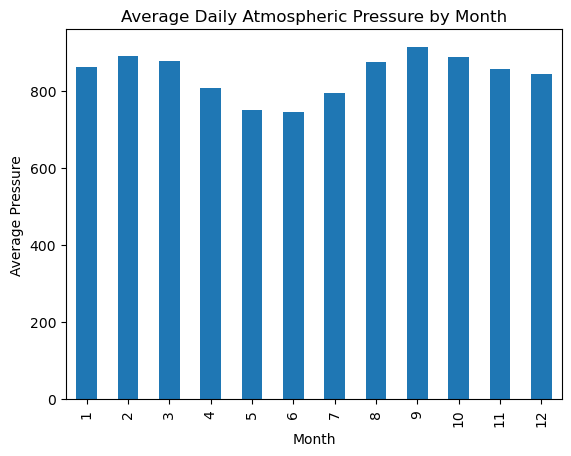

In [34]:

# Plotting average daily atmospheric pressure by month
avg_pressure_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Pressure', title='Average Daily Atmospheric Pressure by Month')


<Axes: title={'center': 'Daily Minimum Temperature'}, xlabel='Date', ylabel='Minimum Temp (C)'>

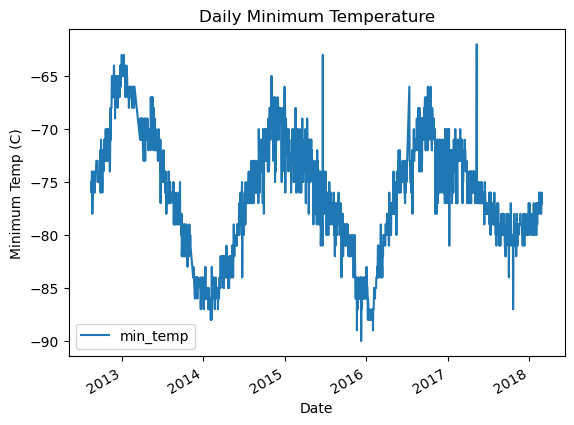

In [35]:

# 5. Estimation of terrestrial days in a Martian year (based on the plot of daily minimum temperature)
# Plot daily minimum temperature to visually estimate the Martian year
mars_df.plot(x='terrestrial_date', y='min_temp', xlabel='Date', ylabel='Minimum Temp (C)', title='Daily Minimum Temperature')


In [36]:

# Export DataFrame to CSV
mars_df.to_csv("Mars_Weather_Data.csv")


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [38]:
mars_df['month'].nunique()


12

In [40]:
# 2. How many Martian days' worth of data are there?
mars_days = len(mars_df['sol'])
print(mars_days)

1867


In [42]:
# 3. What is the average low temperature by month?
temp_DF = mars_df[['month', 'min_temp']]
avg_lows_by_month = temp_DF.groupby('month').mean()
print(avg_lows_by_month)

        min_temp
month           
1     -77.160920
2     -79.932584
3     -83.307292
4     -82.747423
5     -79.308725
6     -75.299320
7     -72.281690
8     -68.382979
9     -69.171642
10    -71.982143
11    -71.985507
12    -74.451807


In [48]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Temperature Deg C')

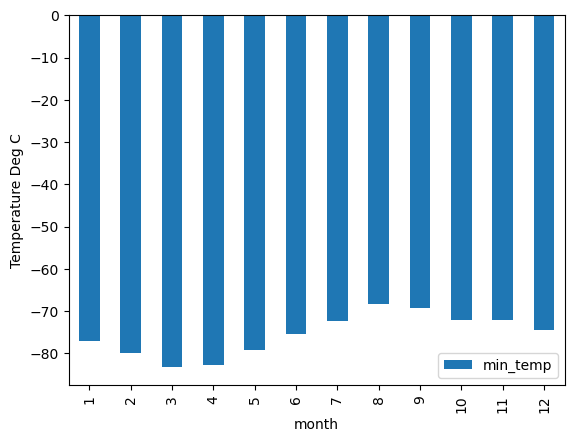

In [49]:
# Plot the average temperature by month
avg_temp_DF = pd.DataFrame(avg_lows_by_month)
avg_temp_DF.plot.bar()
plt.ylabel('Temperature Deg C')

In [50]:
# Identify the coldest and hottest months in Curiosity's location
lowest_avg_temp = avg_temp_DF.min()
highest_avg_temp = avg_temp_DF.max()
low_high = []

for i, row in avg_temp_DF.iterrows():
    if int(row['min_temp']) == int(lowest_avg_temp):
        low_high.append(row)
    elif int(row['min_temp']) == int(highest_avg_temp):
        low_high.append(row)

                       
low_high
#Months 3 and 8 respectively.

/var/folders/48/6ml1twyn1t9_tkycp8mgx3mh0000gn/T/ipykernel_10800/2119830685.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(row['min_temp']) == int(lowest_avg_temp):
/var/folders/48/6ml1twyn1t9_tkycp8mgx3mh0000gn/T/ipykernel_10800/2119830685.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  elif int(row['min_temp']) == int(highest_avg_temp):


[min_temp   -83.307292
 Name: 3, dtype: float64,
 min_temp   -68.382979
 Name: 8, dtype: float64]

In [18]:
# 4. Average pressure by Martian month


In [52]:
# Plot the average pressure by month
pres_DF = mars_df[['month', 'pressure']]
avg_pres_by_month = pres_DF.groupby('month').mean()
print(avg_pres_by_month)

         pressure
month            
1      862.488506
2      889.455056
3      877.322917
4      806.329897
5      748.557047
6      745.054422
7      795.105634
8      873.829787
9      913.305970
10     887.312500
11     857.014493
12     842.156627


Text(0.5, 0, 'Earth Days')

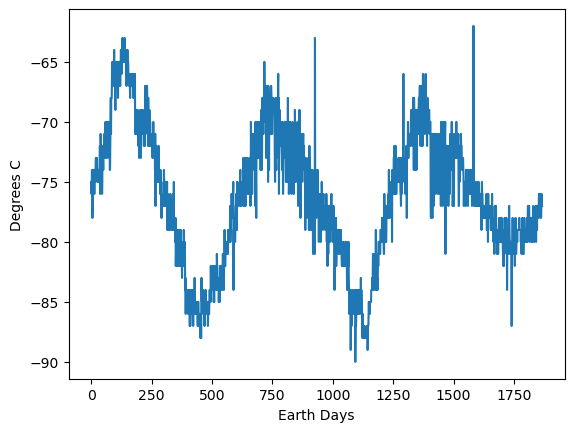

In [54]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_year_DF = mars_df[['terrestrial_date', 'min_temp']]
mars_year_DF['min_temp'].plot()
plt.ylabel('Degrees C')
plt.xlabel('Earth Days')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [56]:
mars_df.to_csv("Mars_Data.csv")


In [57]:
browser.quit()